In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [47]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [51]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [52]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.shape

(150, 6)

In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


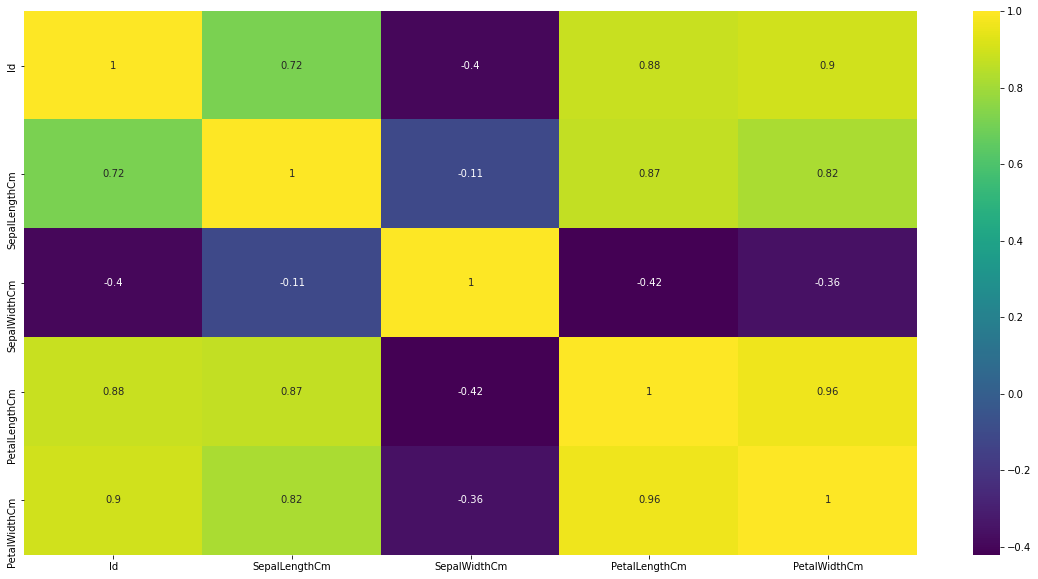

In [9]:
plt.figure(figsize=(20 ,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [44]:
LE=LabelEncoder()

In [12]:
df['Species']=LE.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
X=df.iloc[:, 1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y=df.iloc[:,-1:]
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)
print("=============X_train=============")
print(X_train.head())
print("=============X_test=============")
print(X_test.head())
print("=============y_train=============")
print(y_train.head())
print("=============y_test=============")
print(y_test.head())
print("================================================================")

=============X_train=============
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
123            6.3           2.7            4.9           1.8
80             5.5           2.4            3.8           1.1
43             5.0           3.5            1.6           0.6
6              4.6           3.4            1.4           0.3
112            6.8           3.0            5.5           2.1
=============X_test=============
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
144            6.7           3.3            5.7           2.5
9              4.9           3.1            1.5           0.1
79             5.7           2.6            3.5           1.0
95             5.7           3.0            4.2           1.2
104            6.5           3.0            5.8           2.2
=============y_train=============
     Species
123        2
80         1
43         0
6          0
112        2
=============y_test=============
     Species
144        2
9          0
79   

<h1><font color='green'>Data Visualization (Several Type of Possible Plots)</font></h1>

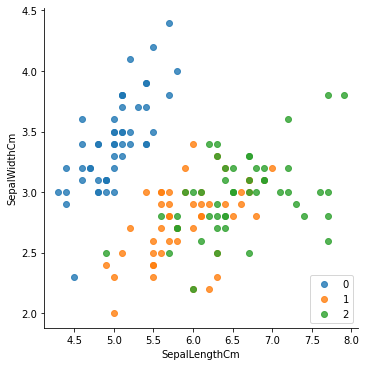

In [16]:
sns.lmplot( x="SepalLengthCm", y="SepalWidthCm", data=df, fit_reg=False, hue='Species', legend=False)
plt.legend(loc='lower right')
plt.show()

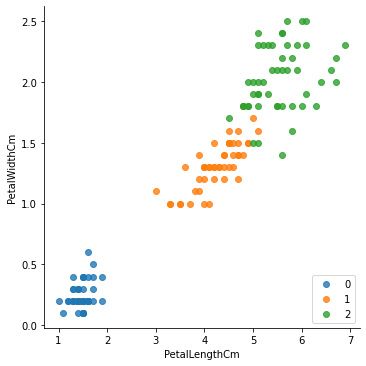

In [17]:
sns.lmplot( x="PetalLengthCm", y="PetalWidthCm", data=df, fit_reg=False, hue='Species', legend=False)
plt.legend(loc='lower right')
plt.show()

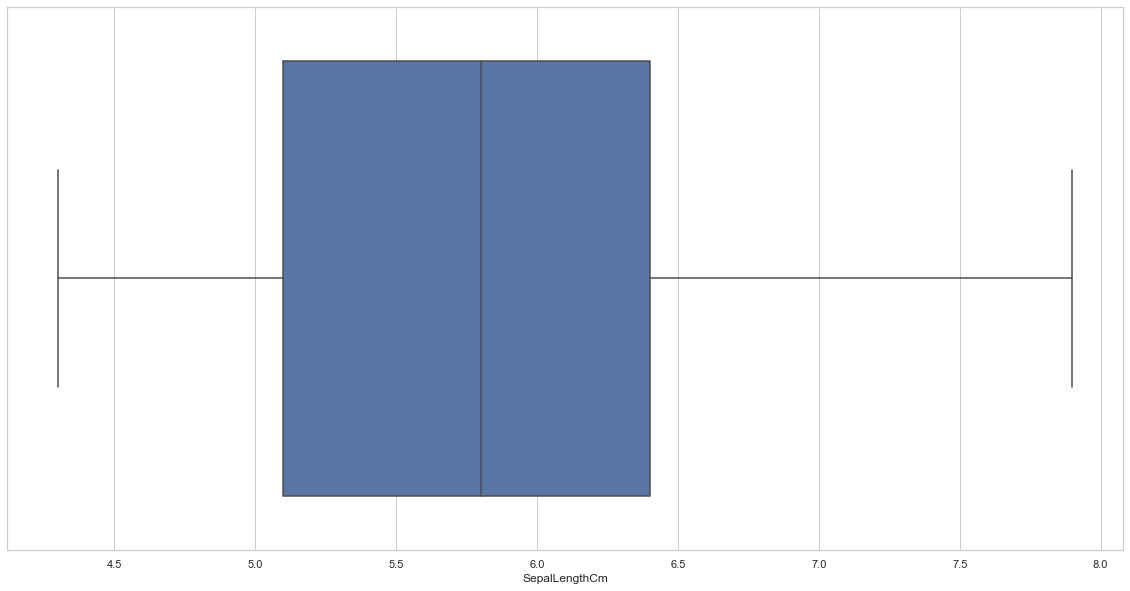

In [18]:
plt.figure(figsize=(20 ,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["SepalLengthCm"])
plt.show()

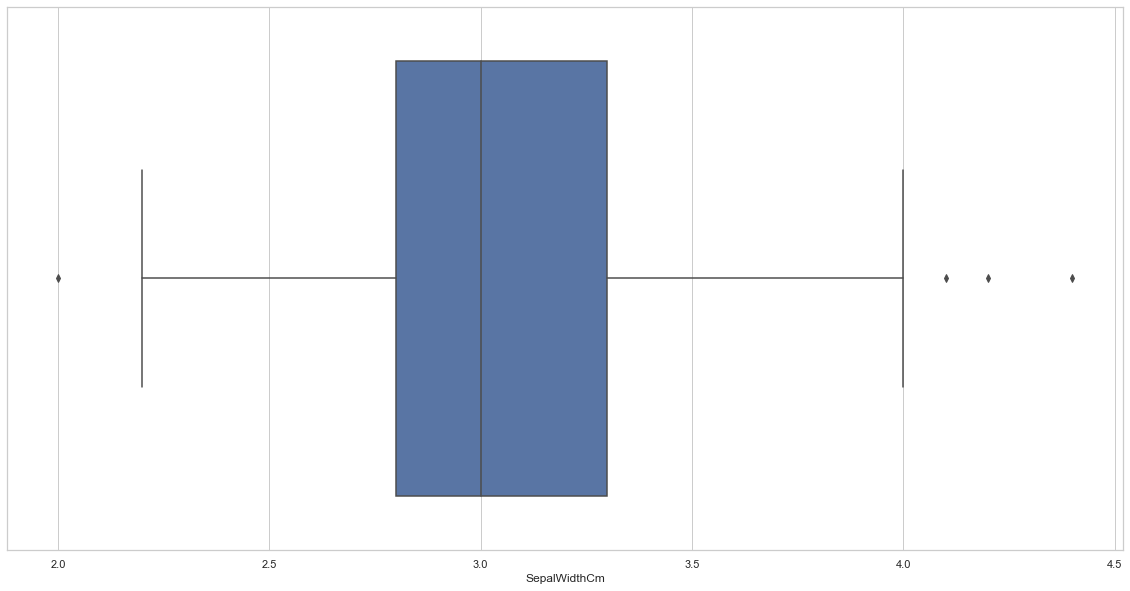

In [19]:
plt.figure(figsize=(20 ,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["SepalWidthCm"])
plt.show()

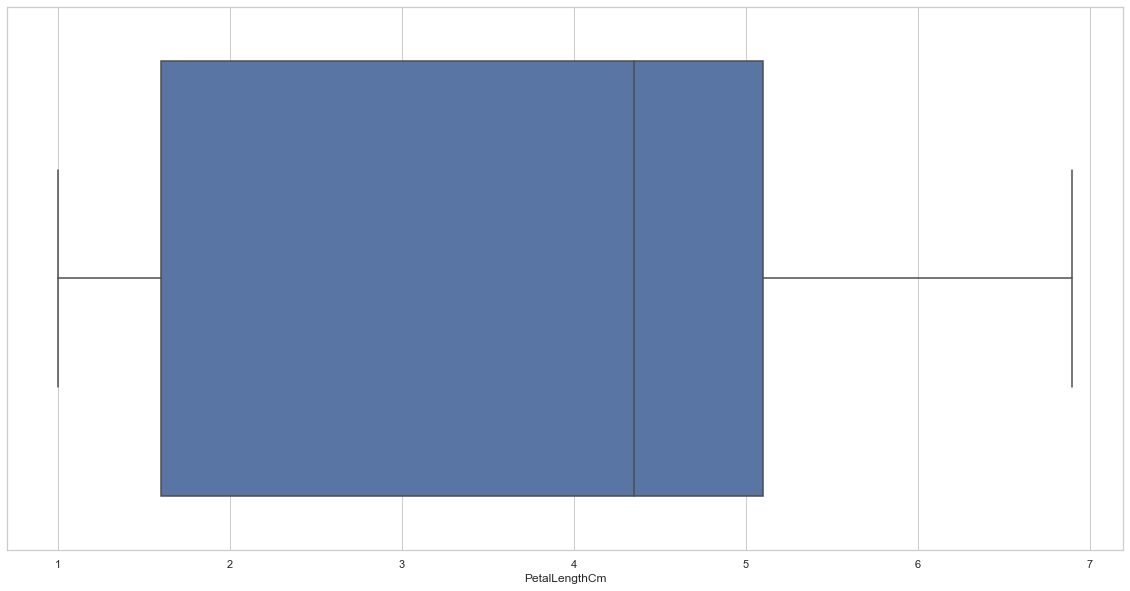

In [20]:
plt.figure(figsize=(20 ,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["PetalLengthCm"])
plt.show()

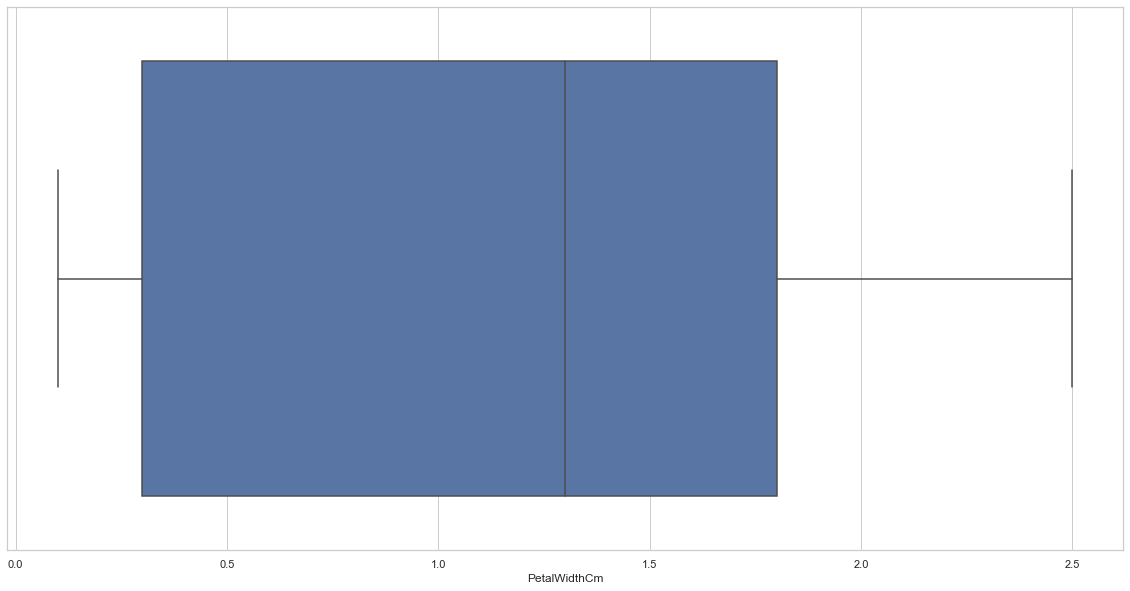

In [21]:
plt.figure(figsize=(20 ,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["PetalWidthCm"])
plt.show()

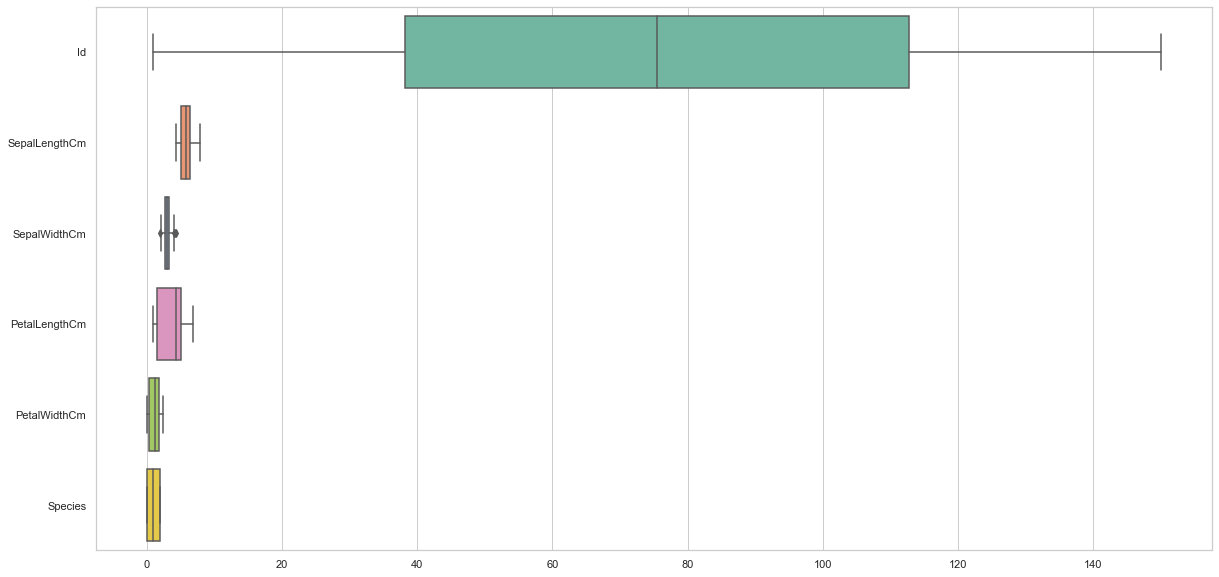

In [22]:
plt.figure(figsize=(20 ,10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

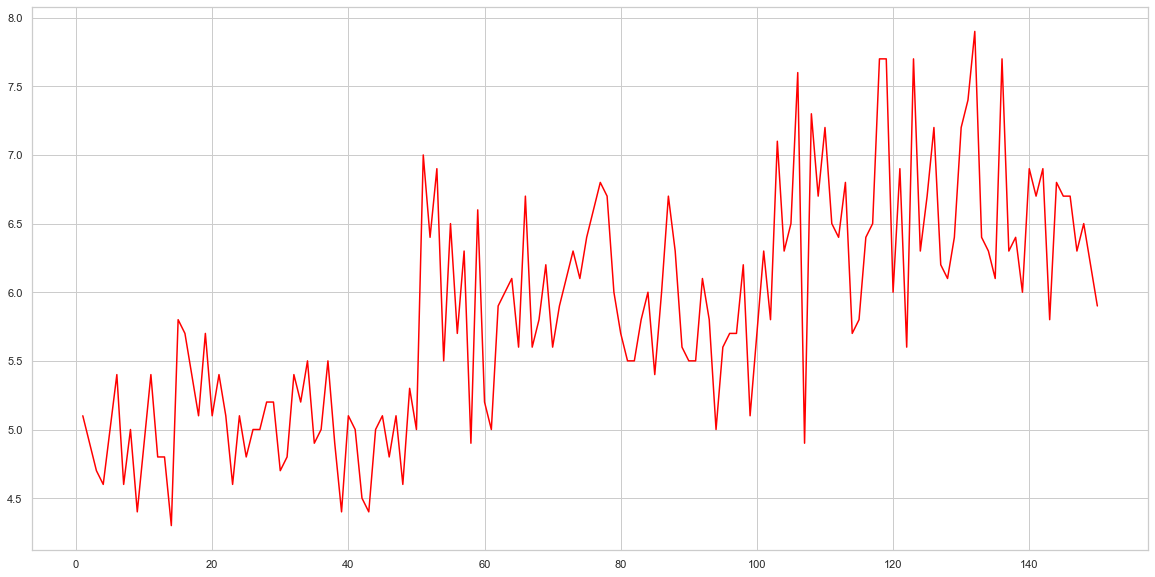

In [23]:
plt.figure(figsize=(20 ,10))
plt.plot(df.Id, df["SepalLengthCm"], "red")
plt.show()

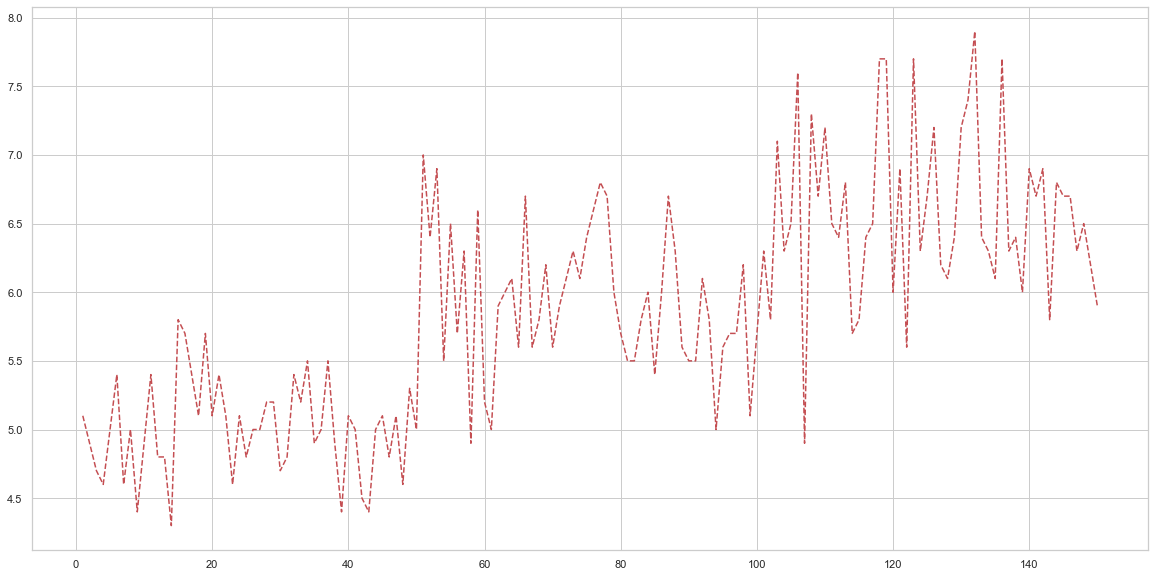

In [24]:
plt.figure(figsize=(20 ,10))
plt.plot(df.Id, df["SepalLengthCm"], "r--")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


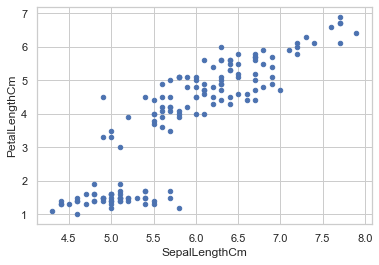

In [25]:
df.plot(kind ="scatter", x ='SepalLengthCm',y ='PetalLengthCm')
plt.show()

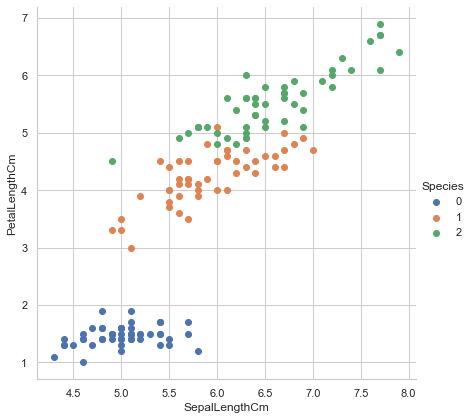

In [26]:
sns.FacetGrid(df, hue ="Species",height = 6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()
sns.set()

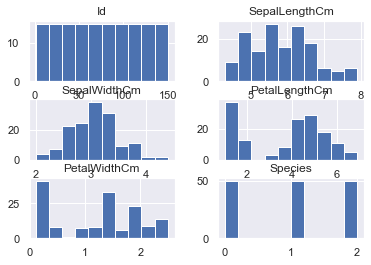

In [27]:
df.hist()
plt.show()

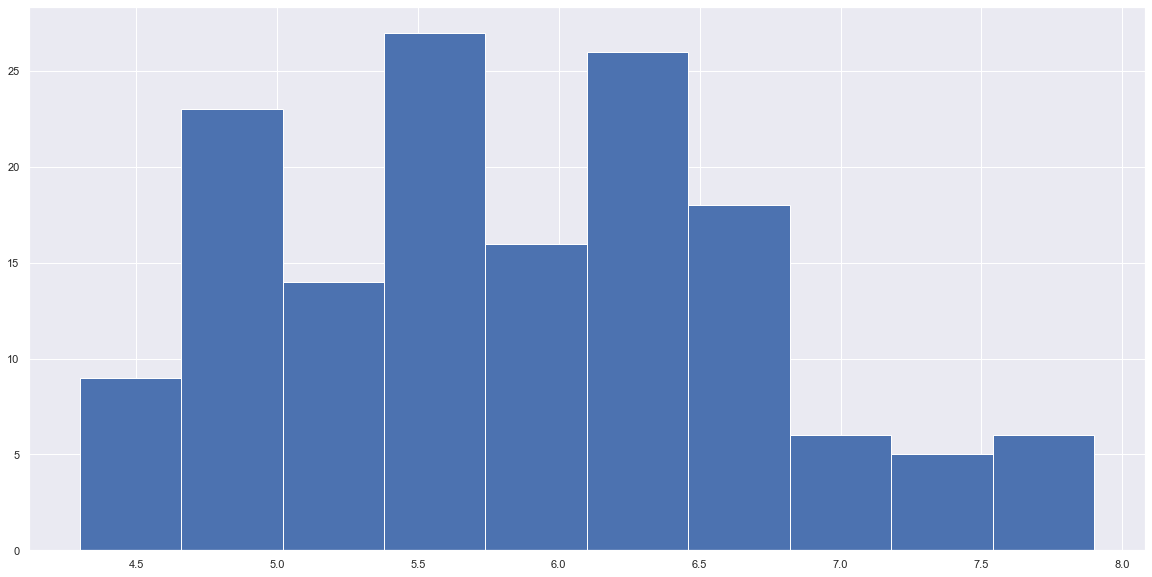

In [28]:
plt.figure(figsize=(20 ,10))
df['SepalLengthCm'].hist()
plt.show()

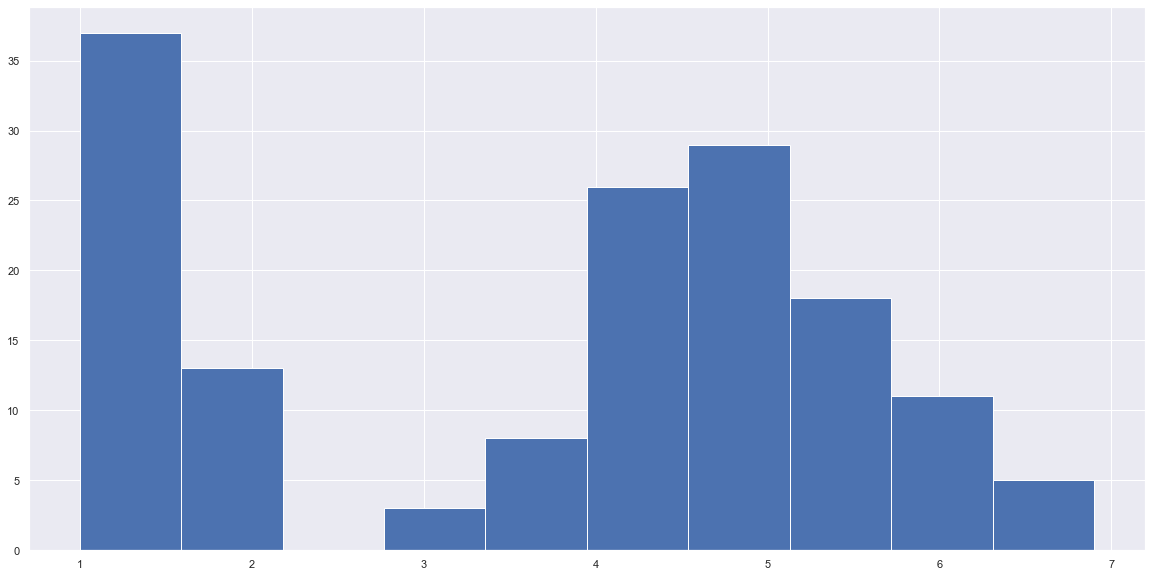

In [29]:
plt.figure(figsize=(20 ,10))
df['PetalLengthCm'].hist()
plt.show()

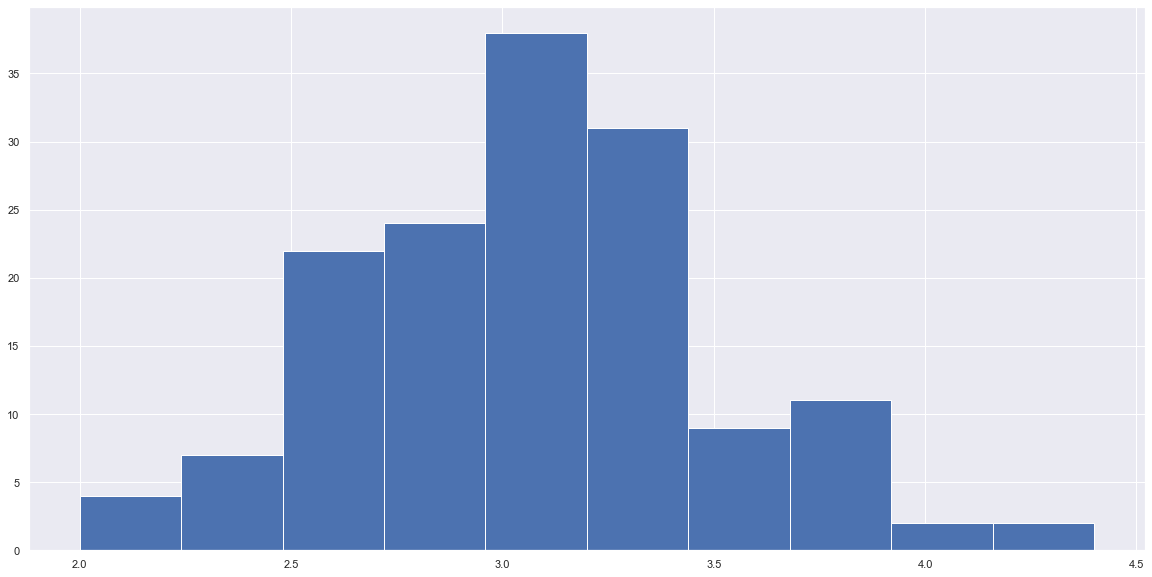

In [30]:
plt.figure(figsize=(20 ,10))
df['SepalWidthCm'].hist()
plt.show()

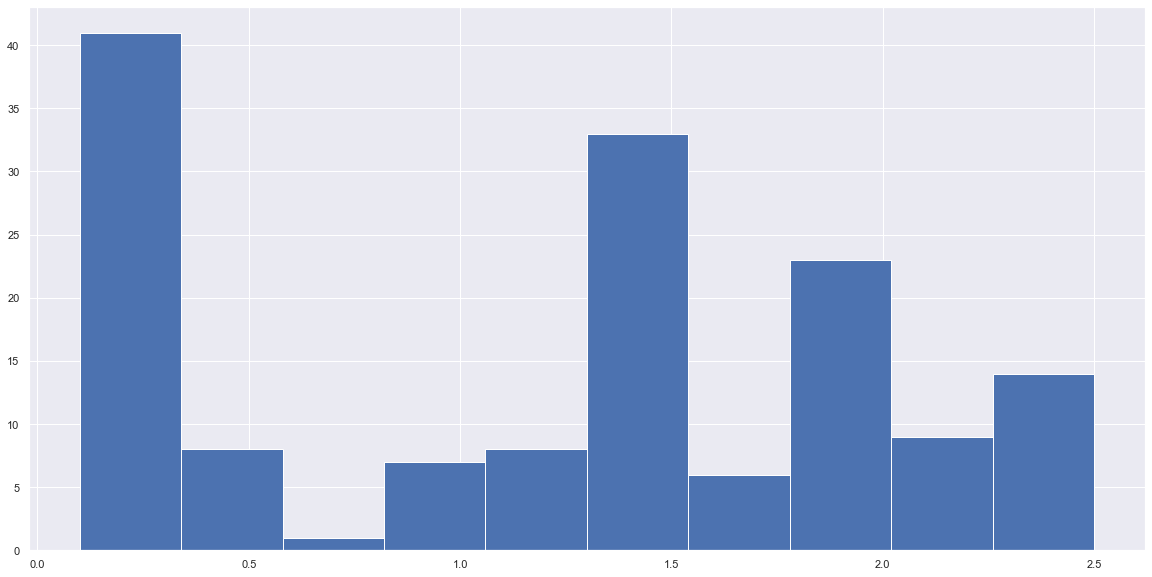

In [31]:
plt.figure(figsize=(20 ,10))
df['PetalWidthCm'].hist()
plt.show()

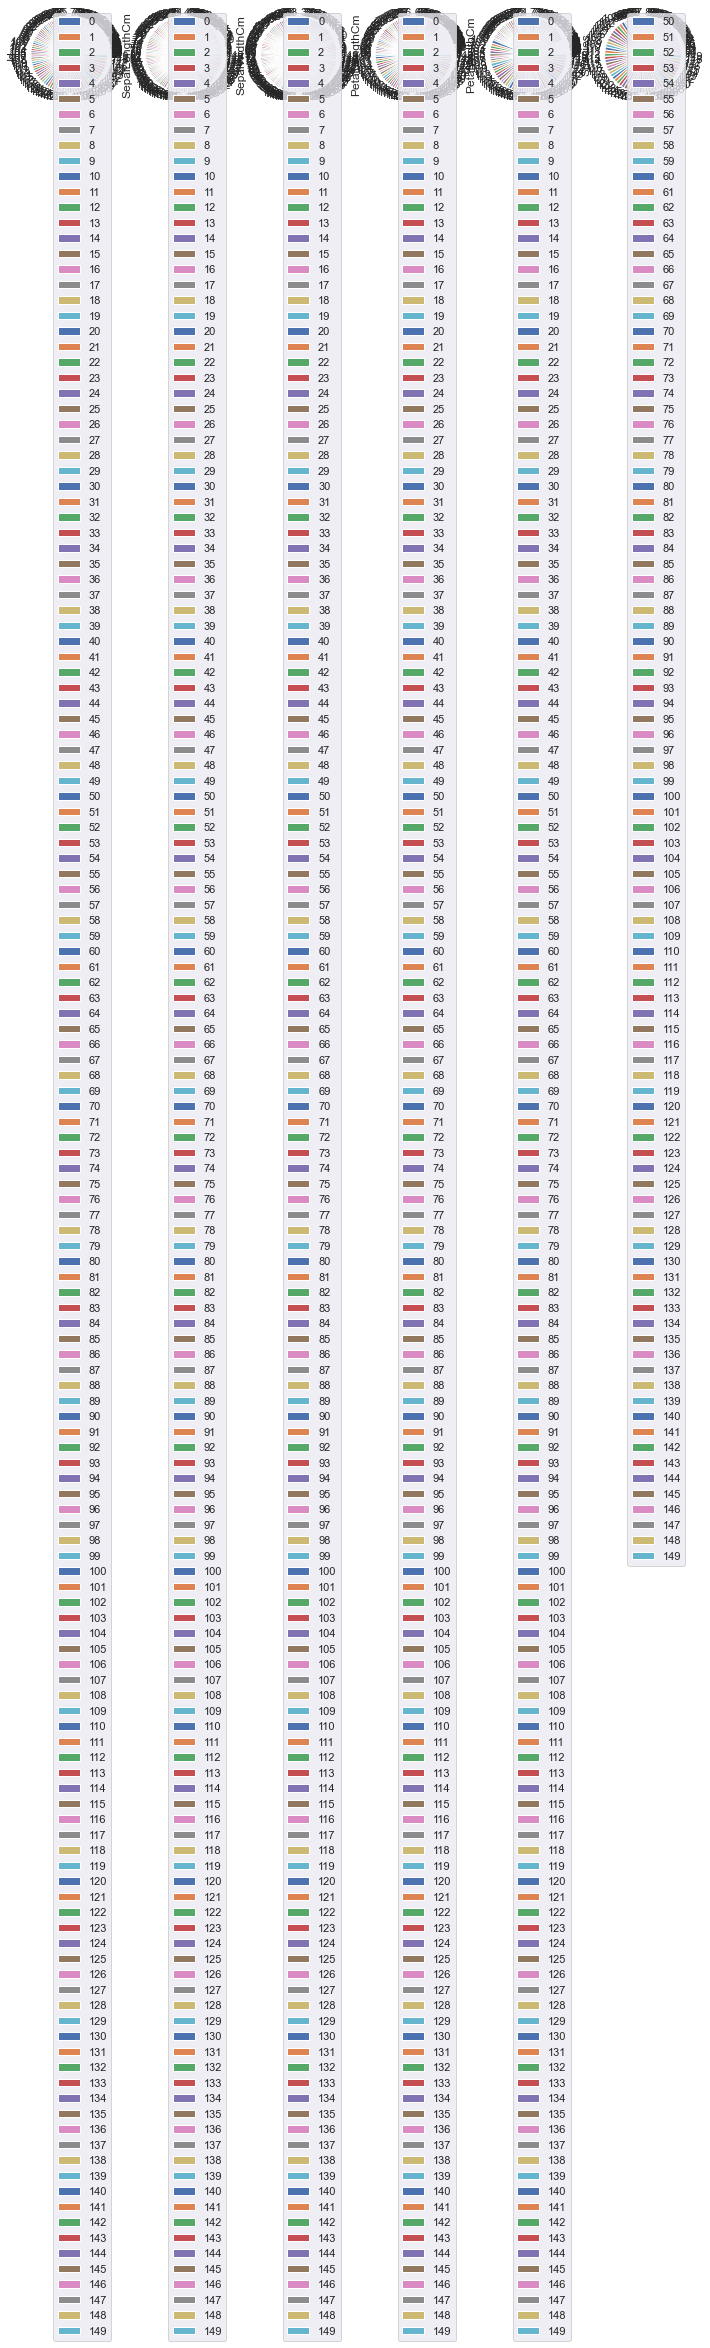

In [32]:
df.plot.pie(figsize =(12, 4), subplots=True)
plt.show()

<AxesSubplot:ylabel='Density'>

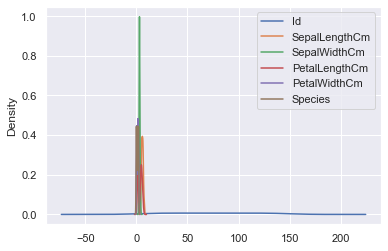

In [33]:
df.plot.kde()

<AxesSubplot:>

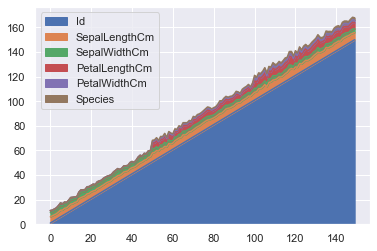

In [34]:
df.plot.area()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

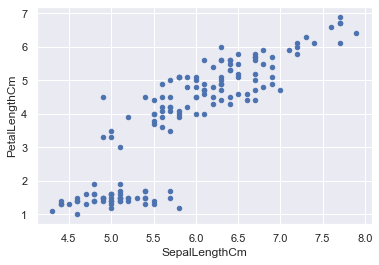

In [35]:
df.plot.scatter(x='SepalLengthCm', y='PetalLengthCm')

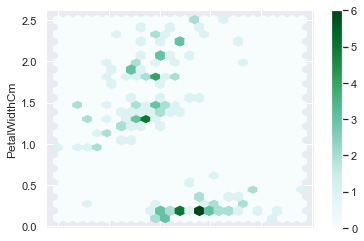

In [36]:
df.plot.hexbin(x ='SepalWidthCm', y ='PetalWidthCm', gridsize = 25)
plt.show()

In [38]:
model=SVC()

In [39]:
model.fit(X_train, y_train)

C:\Users\Gaurishankar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [40]:
y_pred=model.predict(X_test)
y_pred

array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0])

In [41]:
A=accuracy_score(y_test, y_pred)
A

0.9736842105263158

In [42]:
import sklearn.externals
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']